In [35]:
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()


In [37]:
ds = argo_loader.region([-75, -45, 20, 30, 0, 10, '2018-01', '2018-06-30']).to_xarray()
ds_1 = argo_loader.region([-75, -45, 20, 30, 0, 10, '2018-07', '2019-01-01']).to_xarray()

In [38]:
#ds = ArgoDataFetcher().profile(6902746, 30).to_xarray()
df = ds.to_dataframe()

In [45]:
df_1 = ds_1.to_dataframe()
df.tail()

,CONFIG_MISSION_NUMBER,CYCLE_NUMBER,DATA_MODE,DIRECTION,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_QC,PSAL,PSAL_QC,TEMP,TEMP_QC,TIME_QC,LATITUDE,LONGITUDE,TIME
N_POINTS,,,,,,,,,,,,,,,,
6318,8,45,A,D,4902324,1,5.6,1,36.758999,1,28.059999,1,1,24.49239,-66.51279,2018-06-29 17:16:56
6319,8,45,A,D,4902324,1,6.5,1,36.755001,1,28.020000,1,1,24.49239,-66.51279,2018-06-29 17:16:56
6320,8,45,A,D,4902324,1,7.6,1,36.754002,1,27.950001,1,1,24.49239,-66.51279,2018-06-29 17:16:56
6321,8,45,A,D,4902324,1,8.6,1,36.755001,1,27.923000,1,1,24.49239,-66.51279,2018-06-29 17:16:56
6322,8,45,A,D,4902324,1,9.5,1,36.754002,1,27.913000,1,1,24.49239,-66.51279,2018-06-29 17:16:56


In [40]:
df['TIME']= pd.to_datetime(df['TIME'])

In [41]:
df_1['TIME']= pd.to_datetime(df_1['TIME'])

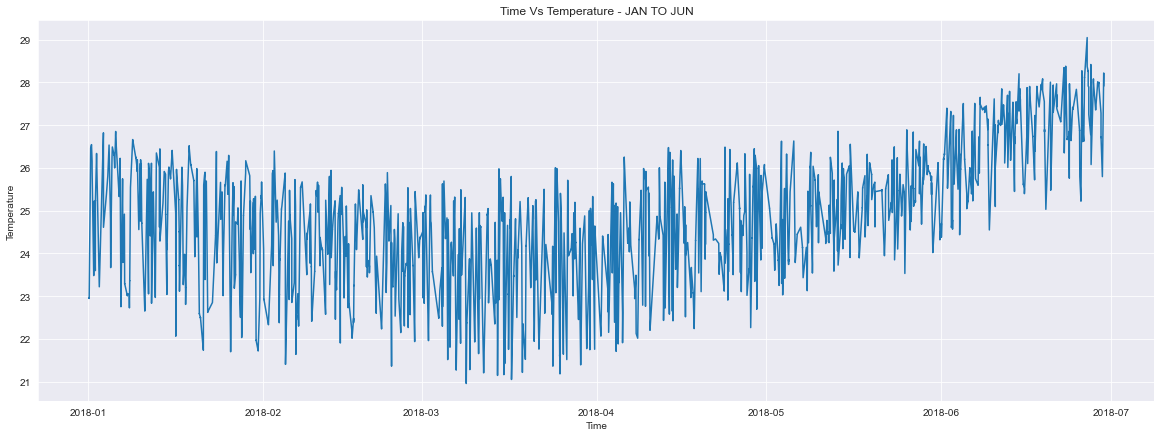

In [42]:
Temp = df['TEMP']
Time = df['TIME']
fig, ax = plt.subplots(figsize =(20,7))
plt.plot(Time, Temp)
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Time Vs Temperature - JAN TO JUN')
ax.grid()
plt.savefig('JAN_JUN.png')

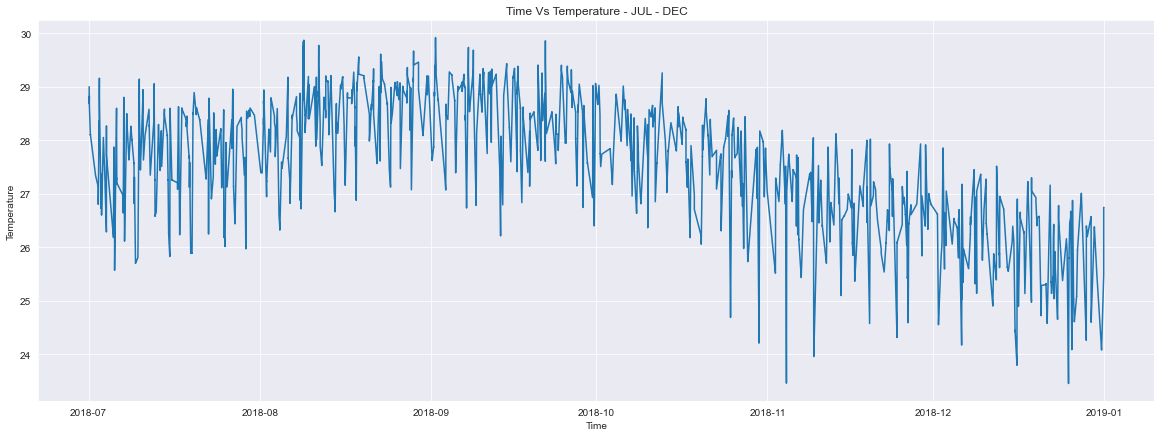

In [43]:
Temp_1 = df_1['TEMP']
Time_1 = df_1['TIME']
fig1, ax1 = plt.subplots(figsize =(20,7))
plt.plot(Time_1, Temp_1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature')
ax1.set_title('Time Vs Temperature - JUL - DEC')
ax1.grid()
plt.savefig('JUL_DEC.png')